![image](https://miro.medium.com/max/5120/1*M3CsWZc0on4-HA0T-TsF9w@2x.png)

## Introduction

In python, we usually use matplotlib and seaborn to do data visualization.
- [matplotlib](https://matplotlib.org/)
- [seaborn](https://seaborn.pydata.org/)

The kind of chart that we choose usually based on type of data (Numeric or Categorical), and data dimension (1 or more dimensions). 
- For example: histogram is usually used for **```Numeric```** data while barchart is used for **```Categorical```** data.

## Import library

First, we import ```seaborn``` and ```matplotlib.pyplot```. Let's call it ```sns``` and ```plt``` respectively. <br>
Remember to use ```%matplotlib inline``` to enable the inline plotting, where the plots/graphs will be displayed just below the cell.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

The dataset we use today is data from a restaurant. Let's download and call it ```restaurant_df```.

In [2]:
restaurant_df = pd.read_csv('https://www.dropbox.com/s/ory0s3z89z3zkt4/restaurant.csv?dl=1')
restaurant_df.head() 

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Basic plot

Seaborn and Matplotlib provide many built-in kind of plot that we could use. Detail could be found below.
* Matplotlib: https://matplotlib.org/stable/tutorials/introductory/sample_plots.html#
* Seaborn: https://seaborn.pydata.org/api.html

First, Let's look at 3 common plots that are usually used: **Histogram, Counplot, Boxplot**

### Histogram, Counplot, Boxplot

#### histogram
A histogram is a graphical representation that organizes a group of data points into user-specified ranges. It mainly work in ```Numeric``` data.

Let's call ```sns.histplot``` and pass on column ```tip```

<AxesSubplot:xlabel='tip', ylabel='Count'>

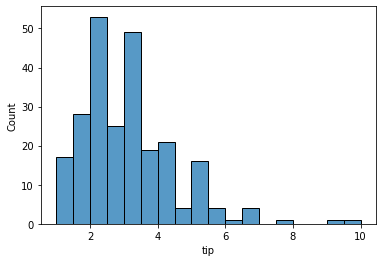

In [3]:
# quick use

sns.histplot(data=restaurant_df['tip'])

Question: Which kind of analysis and variable should be visualized using Histogram?

A/ Continuous

B/ Categorical

<AxesSubplot:xlabel='tip', ylabel='Count'>

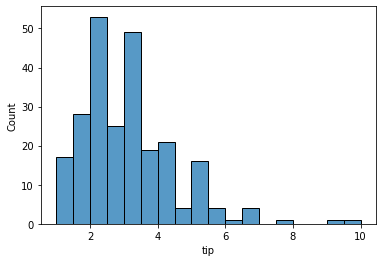

In [4]:
# recommend use

sns.histplot(data=restaurant_df, x="tip")

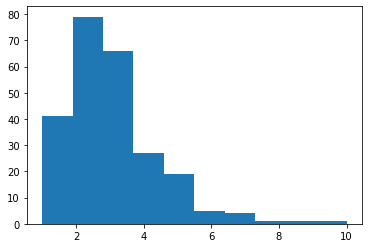

In [5]:
# using matplotlib

plt.hist(x=restaurant_df['tip'])
plt.show()

<AxesSubplot:ylabel='Frequency'>

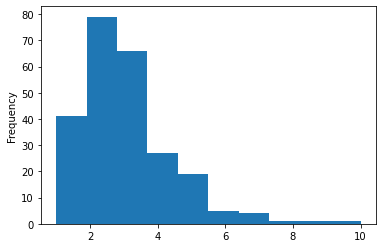

In [6]:
# using pandas

restaurant_df['tip'].plot(kind='hist')

histogram parameters:
- **bins**: A histogram displays numerical data by grouping data into "bins" of equal width. Each bin is plotted as a bar whose height corresponds to how many data points are in that bin. Bins are also sometimes called "intervals", "classes", or "buckets"

Let the value of ```bin``` equal 100 in our plot

<AxesSubplot:xlabel='tip', ylabel='Count'>

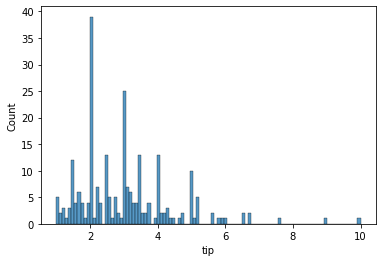

In [7]:
sns.histplot(data=restaurant_df, x="tip", bins = 100)

*We could see that the column width is much smaller than before*

#### Countplot
- A countplot is kind of likea histogram or a bar graph for some categorical area. It simply shows the number of occurrences of an item based on a certain type of category.

Let's call ```sns.countplot``` and pass on column ```day```

<AxesSubplot:xlabel='day', ylabel='count'>

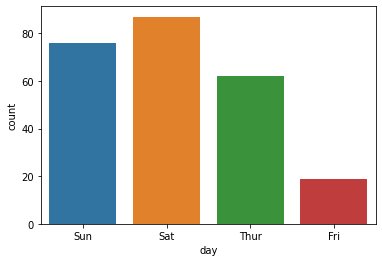

In [8]:
sns.countplot(data=restaurant_df, x="day")

** We don't have countplot in matplotlib, so we use barplot instead. We will see that in next section.*

countplot parameters:
- **order**: order of x axis
- **hue**: Vary hue to distinguish categories

In above plot, the ```day``` in x-axis is not follow weekday. Let's change the order of day by using ```order``` parameter.

<AxesSubplot:xlabel='day', ylabel='count'>

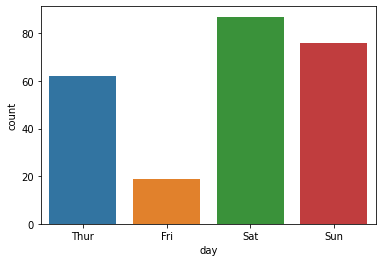

In [9]:
order = ['Thur', 'Fri', 'Sat', 'Sun']
sns.countplot(data=restaurant_df, x="day", order=order)

Now let's say we want to know which gender go to this restaurant more. We do that by pass on ```hue="sex"``` 

<AxesSubplot:xlabel='day', ylabel='count'>

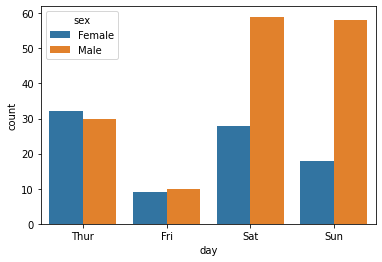

In [10]:
sns.countplot(data=restaurant_df, x="day", order=order, hue='sex')

#### boxplot
- In descriptive statistics, a box plot or boxplot is a method for graphically depicting groups of numerical data through their quartiles.

<AxesSubplot:xlabel='tip'>

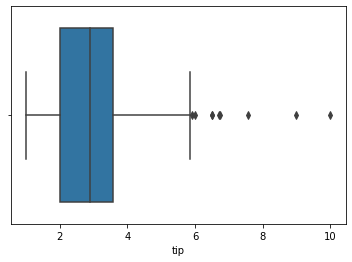

In [11]:
# horizontal box plot

sns.boxplot(data=restaurant_df, x="tip")

<AxesSubplot:ylabel='tip'>

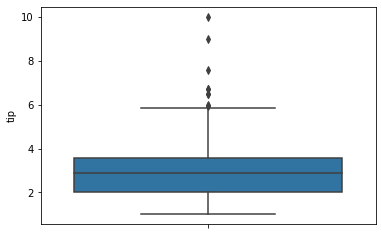

In [12]:
# vertical box plot

sns.boxplot(data=restaurant_df, y="tip")

Question: What value does the line inside the box represent?

A/ Mean

B/ Mode

C/ Median

D/ None of the above 

### Scatter plot
- We use scatter plot to see the correlation between 2 features. 

In [13]:
restaurant_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Let's see the correlation between ```total_bill``` and ```tip```

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

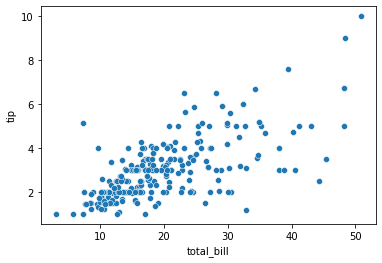

In [14]:
sns.scatterplot(data=restaurant_df, x='total_bill', y='tip')

Question: What correlation between toteal_bill and tip?

A/ Positive

B/ Negative

C/ No relation

### Barplot
[https://seaborn.pydata.org/generated/seaborn.barplot.html](https://seaborn.pydata.org/generated/seaborn.barplot.html)

Barplot (usually) use 2-dimension data.

In [15]:
# Let's calculate the mean of tip by day

plot_data = restaurant_df.groupby('day')['tip'].mean().reset_index()
plot_data

,day,tip
0,Fri,2.734737
1,Sat,2.993103
2,Sun,3.255132
3,Thur,2.771452


We need to reset index so that we can choose the column ```day``` to plot.

<AxesSubplot:xlabel='day', ylabel='tip'>

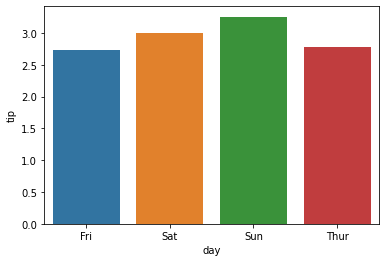

In [16]:
# plot tip by day

sns.barplot(data=plot_data, x='day', y='tip')

## Styling

### background style
[https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html](https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html)

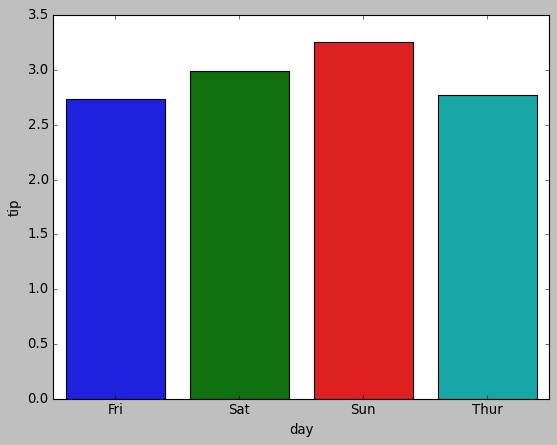

In [22]:
# Set up the theme
plt.style.use('classic')

sns.barplot(data=plot_data, x='day', y='tip')

plt.show()

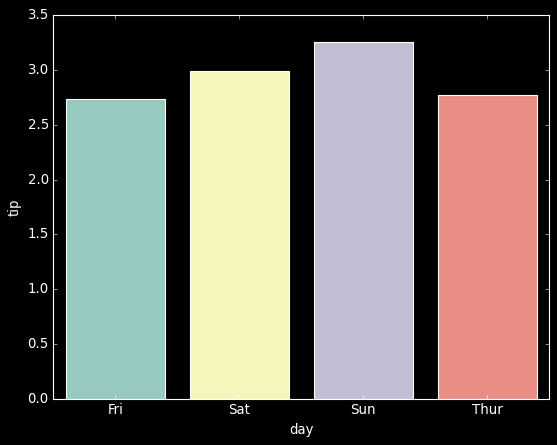

In [18]:
# Set up the theme
plt.style.use('dark_background')

sns.barplot(data=plot_data, x='day', y='tip')

plt.show()

### Chart coloring

- Example: we'll change the color of above chart to yellow

<AxesSubplot:xlabel='day', ylabel='tip'>

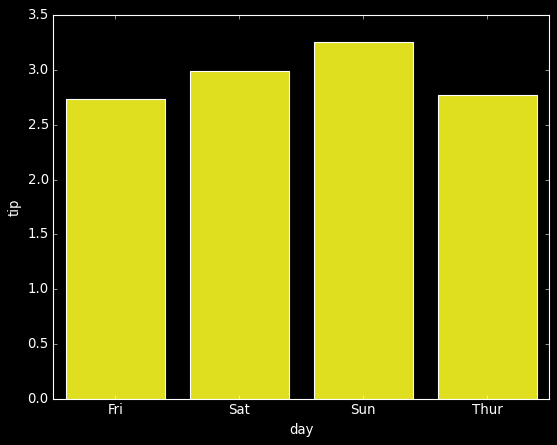

In [19]:
sns.barplot(data=plot_data, x='day', y='tip', color='yellow')

- Color name in Seaborn

<img src="https://i.stack.imgur.com/lFZum.png" height=700>

### Change plot size
- We could use figure to change size of our chart
- Using function ```plt.figure```
- Remember to put this function above our plot

<AxesSubplot:xlabel='day', ylabel='tip'>

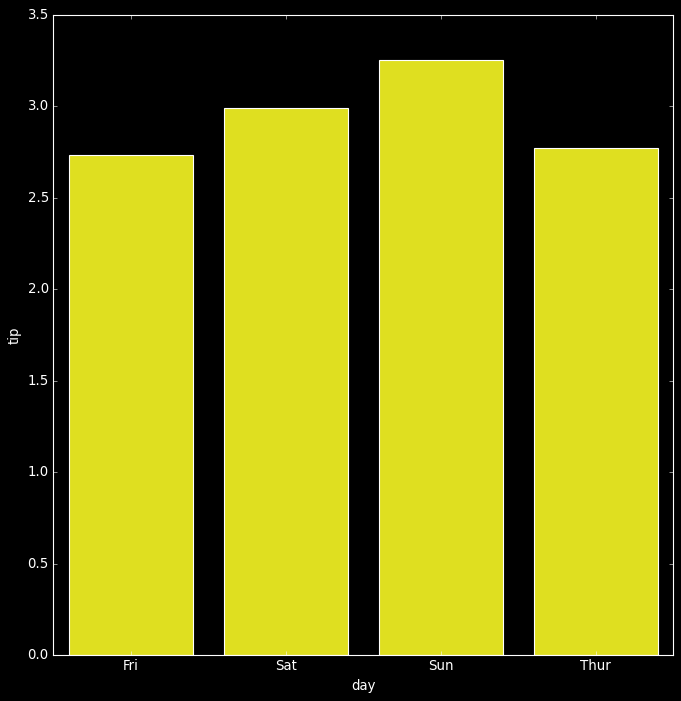

In [20]:
plt.figure(figsize=(10,10))
sns.barplot(data=plot_data, x='day', y='tip', color='yellow')

### Plot multiple chart
- We could use subplot to Plot multiple chart
- Using function ```plt.subplot```
- Remember to put this function above our plot

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

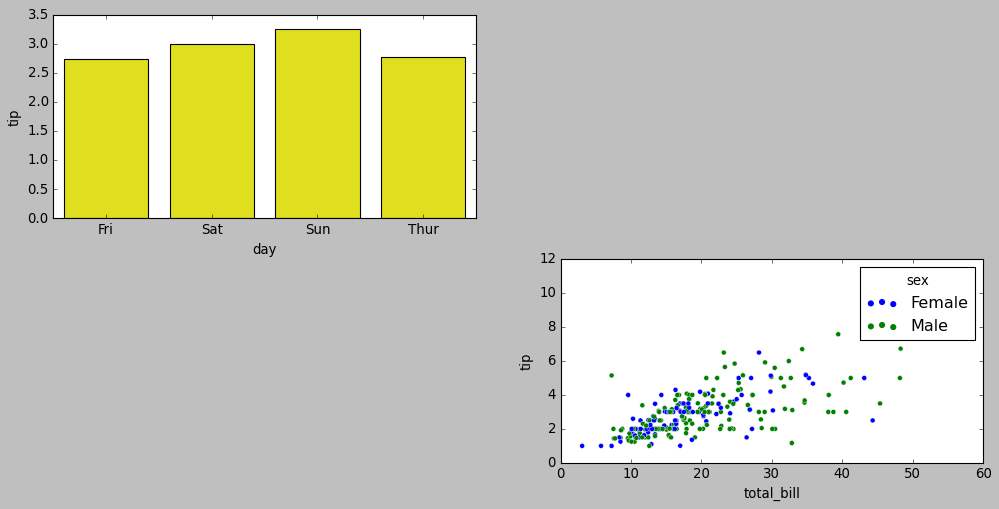

In [24]:
# Define the figure
plt.figure(figsize=(15, 7))

plt.subplot(221) # Layout have 1 row and 2 column
sns.barplot(data=plot_data, x='day', y='tip', color='yellow')

plt.subplot(224)
sns.scatterplot(data=restaurant_df, x='total_bill', y='tip', hue='sex')

explain the number in subplot, for example 121:
- the first digit: number of rows
- the second digit: number of columns
- the third digit: the order of actual subplot that we use to plot

### Adding title, x-title/y-title, x-lim/y-lim,... 

#### chart title

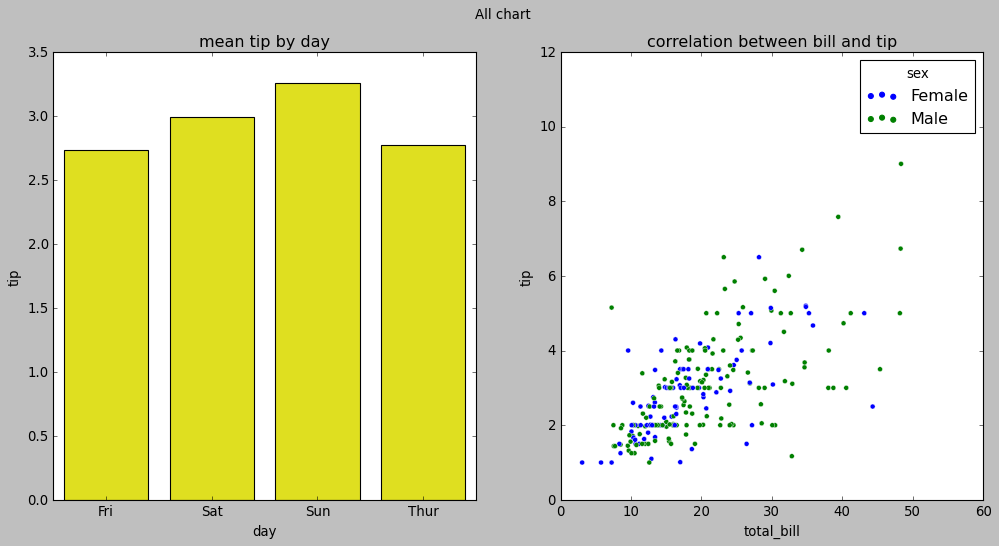

In [25]:
plt.figure(figsize=(15, 7))
plt.suptitle('All chart')

# Plot on first subplot
plt.subplot(121)
sns.barplot(data=plot_data, x='day', y='tip', color='yellow')
plt.title('mean tip by day') # title of 1 subplot

# Plot on second subplot
plt.subplot(122)
sns.scatterplot(data=restaurant_df, x='total_bill', y='tip', hue='sex')
plt.title('correlation between bill and tip') # title of 1 subplot

plt.show()

#### x-label, y-label

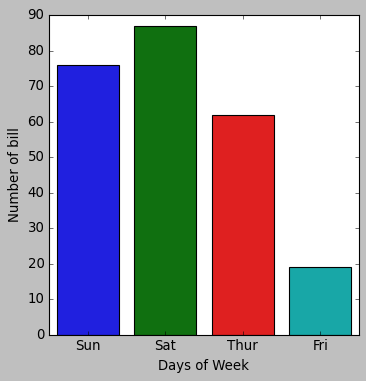

In [26]:
plt.figure(figsize=(5, 5))
sns.countplot(data=restaurant_df,
              x='day')

# using xlabel and ylabel to named x and y axis
plt.xlabel("Days of Week")
plt.ylabel("Number of bill")

plt.show()

#### x-lim, y-lim

For now, the y is from ```0 -> 80```.
Let's change the ylim to ```50```

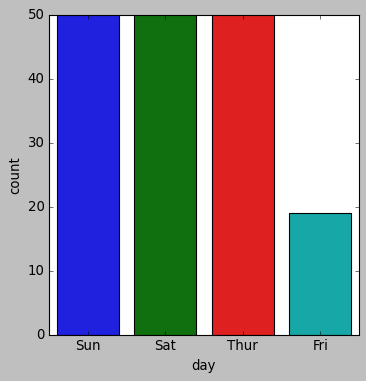

In [27]:
plt.figure(figsize=(5, 5))
sns.countplot(data=restaurant_df,
              x='day')

# Using plt.ylim to limit or expand the range of the y axis.
plt.ylim((0, 50)) 

plt.show()

#### x-ticks, y-ticks

Let's change the name of all x-axis and hide the third one

In [ ]:
plt.figure(figsize=(5, 5))
sns.countplot(data=restaurant_df,
              x='day')

#Tell them which tick position do you want to display
plt.xticks([0,1,3], labels=['doi','cot','x']) 

plt.show()

Change y-axis ticks to step ```5``` instead of ```20```
using numpy arange


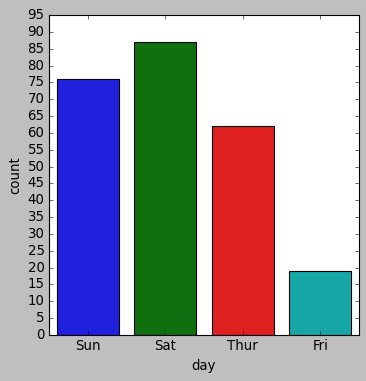

In [29]:
# the same for yticks

plt.figure(figsize=(5, 5))
sns.countplot(data=restaurant_df,
              x='day')

plt.yticks(np.arange(0, 100, 5)) 
plt.show()